In [3]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [5]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

In [7]:
train_data.shape

(60000, 28, 28)

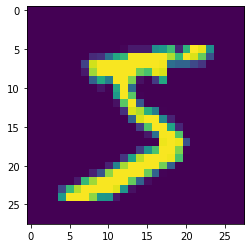

In [8]:
plt.imshow(train_data[0])

In [10]:
train_labels[0]

5

In [12]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation = 'softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_train = x_train.astype('float32')/255

In [16]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [17]:
train_labels[0]

5

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.9127
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2907 - accuracy: 0.9161
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9196
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.9229
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.9260


In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 10785.8896 - accuracy: 0.8703


[10785.8896484375, 0.8702999949455261]